# 1.Importer les données

In [501]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 2. Lecture du fichier

In [502]:
data = pd.read_csv('Book1.csv')

# 3. Prétraitement des données

In [503]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [504]:
data.shape

(45211, 17)

In [505]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [506]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [507]:
list_object = ['job',
               'marital',
               'education',
               'default',
               'housing',
               'loan',
               'contact',
               'month',
               'poutcome'
]

In [508]:
label_encoder = LabelEncoder()
for type in list_object:
    data[type] = label_encoder.fit_transform(data[type])

In [509]:
data['y'] = label_encoder.fit_transform(data['y'])

In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [511]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [512]:
data.corr().y.sort_values(ascending =False)

y            1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

# 4. Division des données

In [513]:
X = data.iloc [:, :-1]
y = data.iloc[:, -1]

In [514]:
print(X.shape)
print(y.shape)

(45211, 16)
(45211,)


In [515]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=8)

In [516]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (27126, 16)
y_train: (27126,)
X_test: (18085, 16)
y_test: (18085,)


<Axes: >

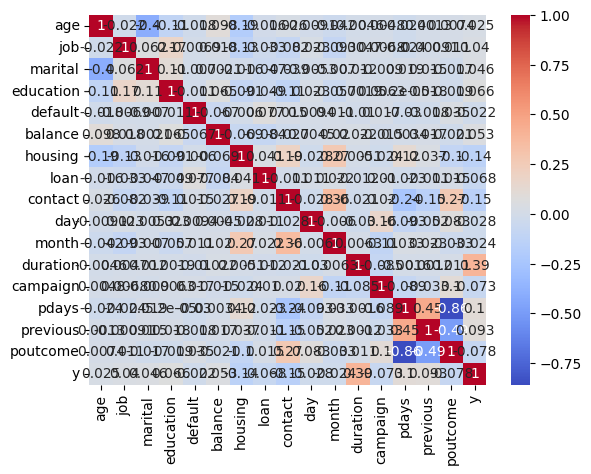

In [517]:
import seaborn as sns
sns.heatmap(data.corr(), annot =True, cmap='coolwarm')

In [518]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Construction du réseau de neuronnes

In [519]:
model = Sequential()

In [520]:
model.add(Dense(600, input_shape = (16, ), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))


#Ajout de la couche de sortie
model.add(Dense(1, activation='sigmoid'))
#Compiler le model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
#Affichage
model.summary()

C:\Users\User\anaconda3\envs\bac4IA_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 600)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 512)            │       307,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,353 (1.39 MB)

 Trainable params: 363,353 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Entrainement du modèle

In [521]:
history = model.fit(X_train, y_train, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
848/848 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8729 - loss: 0.3424 - val_accuracy: 0.8948 - val_loss: 0.2422
Epoch 2/150
848/848 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8975 - loss: 0.2426 - val_accuracy: 0.8980 - val_loss: 0.2376
Epoch 3/150
848/848 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8983 - loss: 0.2344 - val_accuracy: 0.8964 - val_loss: 0.2359
Epoch 4/150
848/848 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8970 - loss: 0.2409 - val_accuracy: 0.8965 - val_loss: 0.2351
Epoch 5/150
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9003 - loss: 0.2335 - val_accuracy: 0.8979 - val_loss: 0.2339
Epoch 6/150
848/848 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9019 - loss: 0.2301 - val_accuracy: 0.8993 - val_loss: 0.2362
Epoch 7/150
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9044 - loss: 0.2224 - val_accuracy: 0.8981 - val_loss: 0.2315
Epoch 8/150
848/848 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9038 - loss: 0.2278 - val_accu

# 7. Evaluation du modèle

In [522]:
# 7. Visualiser l’evolution de l’entrainement du réseau de neurone
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

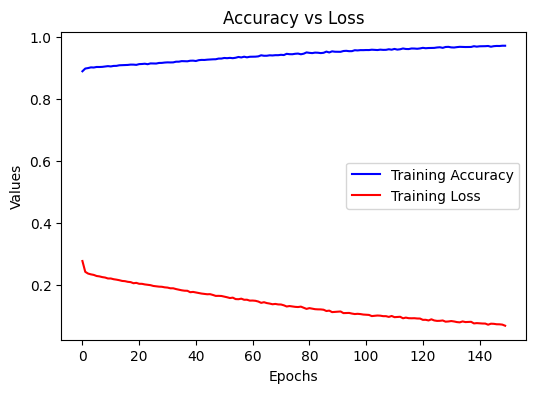

In [523]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

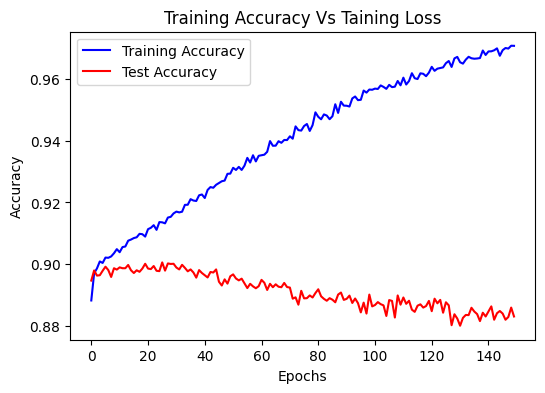

In [524]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

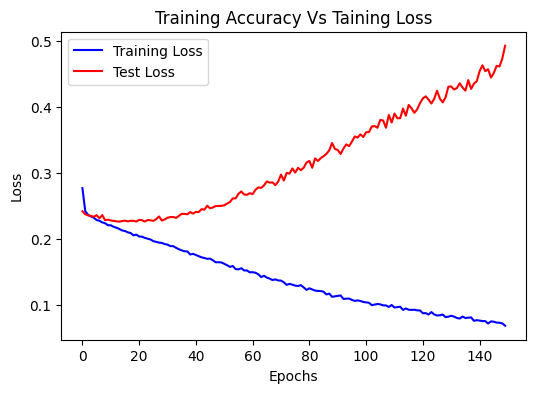

In [525]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

In [526]:
y_pred = model.predict(X_test)

566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step


In [527]:
y_pred

array([[5.6062942e-07],
       [6.9417995e-03],
       [2.0316669e-07],
       ...,
       [1.4645527e-05],
       [9.8644989e-04],
       [6.8723869e-01]], dtype=float32)